In [1]:
import pandas as pd

In [2]:
mydata=pd.read_csv("Mall_Customers.csv")

In [3]:
mydata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
mydata.drop('CustomerID',axis=1,inplace=True)

In [8]:
mydata.drop('Genre',axis=1,inplace=True)

In [9]:
mydata.drop('Age',axis=1,inplace=True)

In [11]:
mydata

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
mydata.rename(columns={'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)':'Spending_score'}, inplace=True)

In [20]:
mydata

,Annual_Income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
import seaborn as sb

<AxesSubplot: xlabel='Annual_Income', ylabel='Spending_score'>

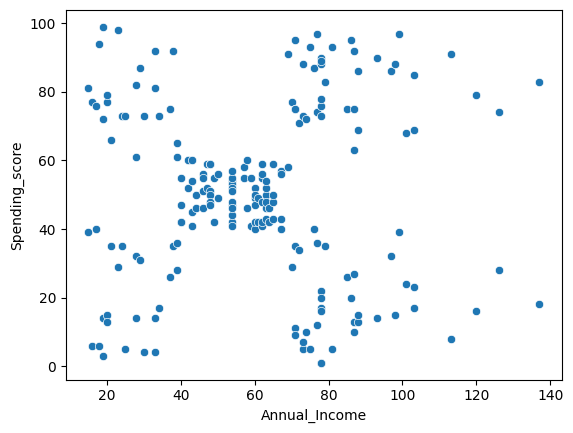

In [ ]:
sb.scatterplot(data=mydata,x='Annual_Income',y='Spending_score')
sb

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans=KMeans(n_clusters=3,random_state=None)

In [26]:
kmeans.fit(mydata)

KMeans(n_clusters=3)

In [28]:
centroids=kmeans.cluster_centers_

In [38]:
centroids


array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

In [45]:
cen_x=[centroids[0][0],centroids[1][0],centroids[2][0]]
cen_y=[centroids[0][1],centroids[1][1],centroids[2][1]]

<AxesSubplot: xlabel='Annual_Income', ylabel='Spending_score'>

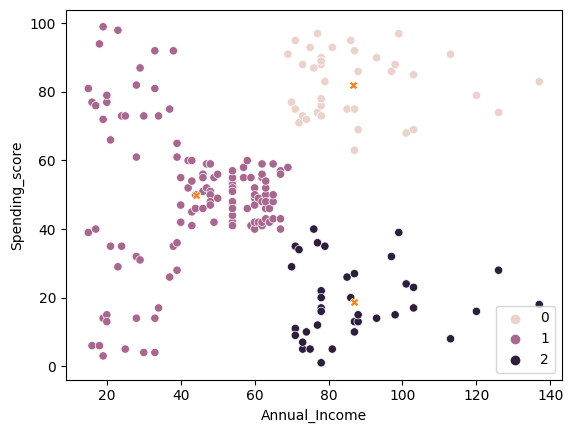

In [58]:
sb.scatterplot(data=mydata,x='Annual_Income',y='Spending_score',hue=kmeans.labels_)
sb.scatterplot(x=cen_x,y=cen_y,marker='X')

In [65]:
keys_values={}
for k in range(1,10):
    k_means=KMeans(n_clusters=k,random_state=None)
    k_means.fit(mydata)
    keys_values[k]=k_means.inertia_

In [72]:
keys_values

{1: 269981.2800000001,
 2: 181363.59595959596,
 3: 106348.37306211119,
 4: 73679.78903948834,
 5: 44448.45544793371,
 6: 37233.81451071001,
 7: 30273.394312070042,
 8: 24986.52564064288,
 9: 21818.11458845218}

In [66]:
import matplotlib.pyplot as plt

In [74]:
listx=list(keys_values.keys())
listy=list(keys_values.values())

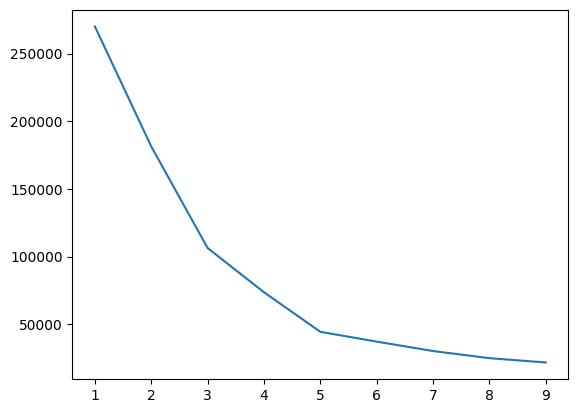

In [75]:
plt.plot(listx,listy)
plt.title()

In [76]:
new_k_mean=KMeans(n_clusters=5,random_state=None)
new_k_mean.fit(mydata)

KMeans(n_clusters=5)

In [82]:
new_centroids=new_k_mean.cluster_centers_

In [83]:
new_centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [84]:
new_cen_x=[new_centroids[0][0],new_centroids[1][0],new_centroids[2][0],new_centroids[3][0],new_centroids[4][0]]
new_cen_y=[new_centroids[0][1],new_centroids[1][1],new_centroids[2][1],new_centroids[3][1],new_centroids[4][1]]

<AxesSubplot: xlabel='Annual_Income', ylabel='Spending_score'>

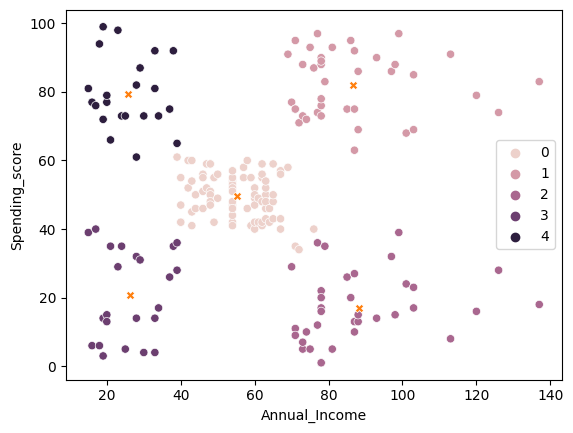

In [85]:
sb.scatterplot(data=mydata,x='Annual_Income',y='Spending_score',hue=new_k_mean.labels_)
sb.scatterplot(x=new_cen_x,y=new_cen_y,marker='X')

In [89]:
predicted_point=new_k_mean.predict([[40,40]])

/home/student/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [90]:
predicted_point

array([0], dtype=int32)

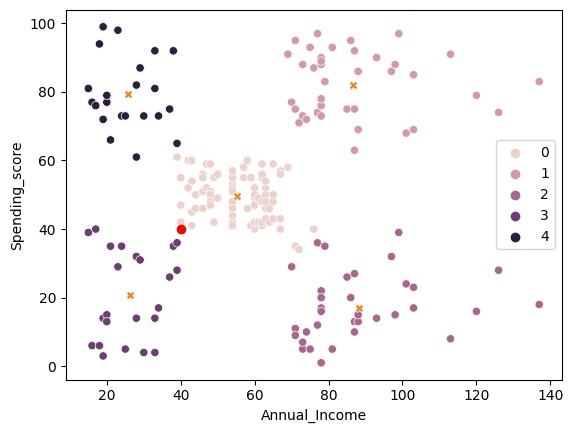

In [95]:
sb.scatterplot(data=mydata,x='Annual_Income',y='Spending_score',hue=new_k_mean.labels_)
sb.scatterplot(x=new_cen_x,y=new_cen_y,marker='X')
plt.plot(40,40,'ro')

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
agglo_clust=AgglomerativeClustering(n_clusters=5,linkage='single',affinity='euclidean')

In [99]:
agglo_clust.fit(mydata)

AgglomerativeClustering(linkage='single', n_clusters=5)

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage

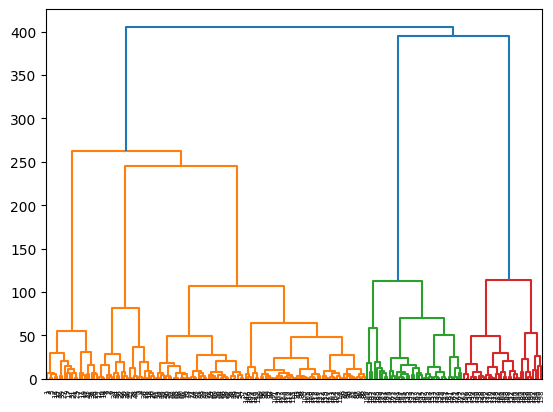

In [108]:
cd = dendrogram(linkage(mydata, method='ward'))